In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

#data as numpy
X = X.values
y = y.values

#splitting the data into trrain and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

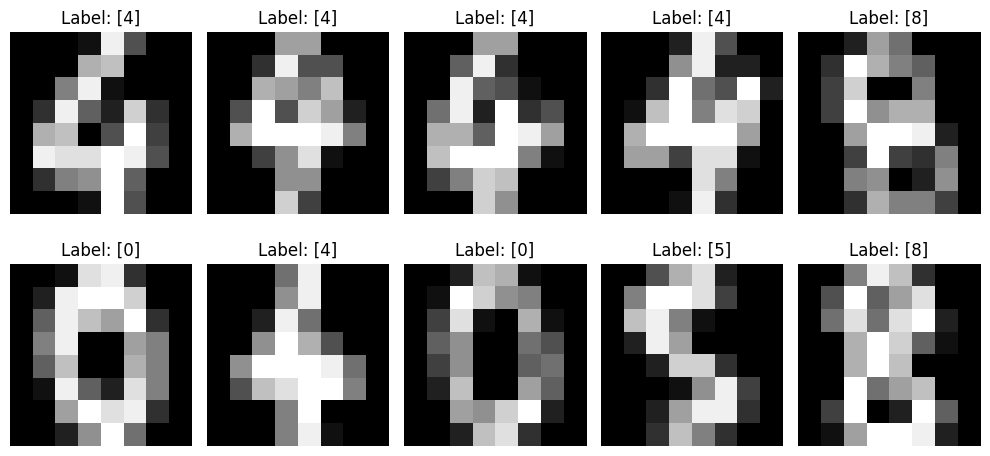

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the first 10 images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import Normalizer

# Initialize Normalizer
scaler = Normalizer()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
X_train_scaled[i].shape

(64,)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import regularizers

# Define the model architecture
model = Sequential([
    Input(shape=(64,)),  # Flatten the 8x8 images to 64-dimensional vectors
    # Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    Dense(64, activation='relu',\
          # kernel_regularizer=regularizers.l2(0.001)
          ),  # Hidden layer with 64 neurons and ReLU activation
    Dropout(0.20),# Hidden layer with 128 neurons and ReLU activation
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.20),# Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])



In [112]:
#summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 10)                330       
                                                                 
Total params: 6570 (25.66 KB)
Trainable params: 6570 (25.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2)

Epoch 1/300
113/113 [==============================] - 1s 5ms/step - loss: 2.1929 - accuracy: 0.2906 - val_loss: 1.8684 - val_accuracy: 0.6678
Epoch 2/300
113/113 [==============================] - 0s 3ms/step - loss: 1.4462 - accuracy: 0.6368 - val_loss: 0.9049 - val_accuracy: 0.8789
Epoch 3/300
113/113 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.7706 - val_loss: 0.5474 - val_accuracy: 0.9233
Epoch 4/300
113/113 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.8190 - val_loss: 0.4074 - val_accuracy: 0.9389
Epoch 5/300
113/113 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.8676 - val_loss: 0.3339 - val_accuracy: 0.9500
Epoch 6/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.8724 - val_loss: 0.2989 - val_accuracy: 0.9489
Epoch 7/300
113/113 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.8910 - val_loss: 0.2685 - val_accuracy: 0.9567

In [114]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
# print("Test Accuracy:", test_accuracy)
# print("loss:", test_loss)

36/36 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9804


36/36 [==============================] - 0s 1ms/step


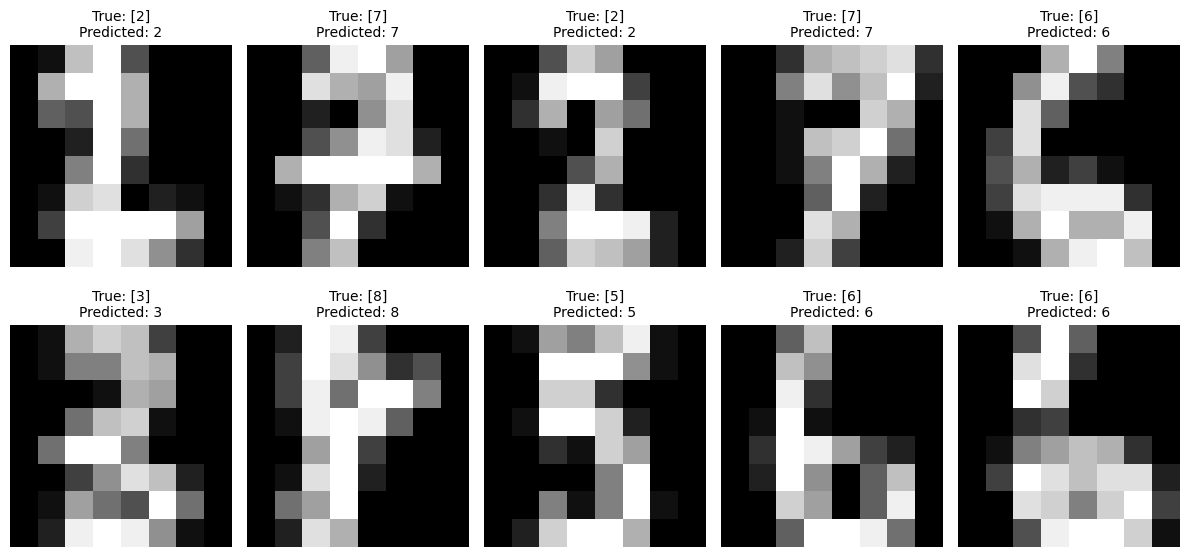

In [115]:
import numpy as np
import matplotlib.pyplot as plt


# Function to plot images with true and predicted labels
def plot_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(8,8), cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate predictions on test data
predicted_labels = np.argmax(model.predict(X_test), axis=-1)

# Select a few random images from the test set for visualization
random_indices = np.random.choice(len(X_test), size=10, replace=False)
sample_images = X_test[random_indices]
true_labels = y_test[random_indices]

# Plot the sample images along with true and predicted labels
plot_images(sample_images, true_labels, predicted_labels[random_indices])


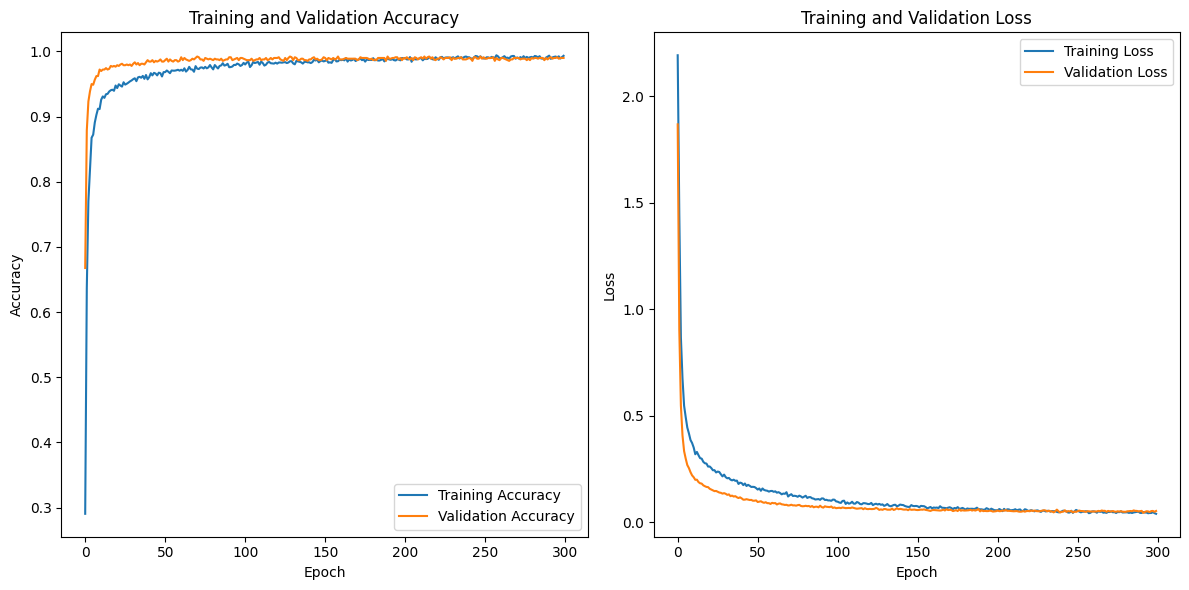

In [116]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plot training history
plot_training_history(history)


In [117]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(predicted_labels, y_test)
class_names= [ str(i) for i in range(10)]

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 640x480 with 0 Axes>

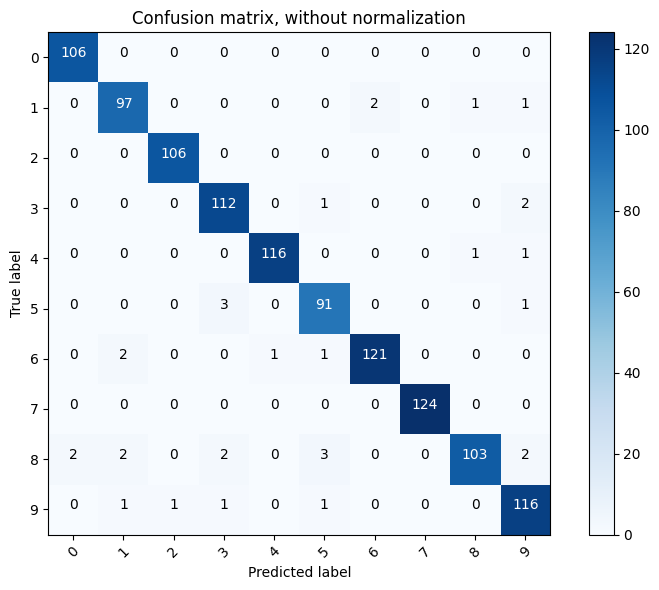

<Figure size 640x480 with 0 Axes>

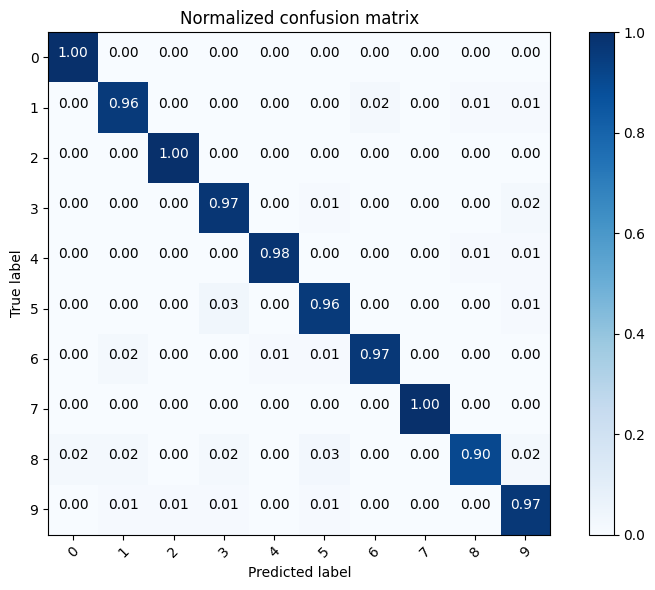

In [118]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
